**1** **Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
crimes = pd.read_csv("DATASET.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL
4,191921269,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST


In [7]:
crimes["HOUR OCC"] = crimes["TIME OCC"].str[:2].astype(int)
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION,HOUR OCC
0,10304468,2020-01-08,2020-01-08,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Other,1100 W 39TH PL,22
1,190101086,2020-01-02,2020-01-01,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,700 S HILL ST,33
2,200110444,2020-04-14,2020-02-13,1200,Central,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,NaN,Adult Arrest,200 E 6TH ST,12
3,191501505,2020-01-01,2020-01-01,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,NaN,Invest Cont,5400 CORTEEN PL,17
4,191921269,2020-01-01,2020-01-01,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,NaN,Invest Cont,14400 TITUS ST,41


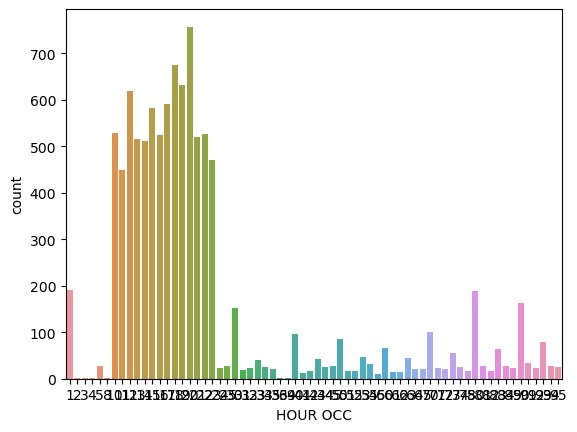

In [8]:
sns.countplot(data=crimes, x="HOUR OCC")
plt.show()

**2** **Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)?**

In [9]:
peak_crime_hour = 12

night_time = crimes[crimes["HOUR OCC"].isin([22,23,0,1,2,3])]

peak_night_crime_location = night_time.groupby("AREA NAME", 
                                               as_index=False)["HOUR OCC"].count().sort_values("HOUR OCC",
                                                                                               ascending=False).iloc[0]["AREA NAME"]
print(f"The area with the largest volume of night crime is {peak_night_crime_location}")

The area with the largest volume of night crime is Harbor


**3** **Identify the number of crimes committed against victims by age group (0-17, 18-25, 26-34, 35-44, 45-54, 55-64, 65+)**

In [10]:
age_bins = [0, 17, 25, 34, 44, 54, 64, np.inf]
age_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

crimes["Age Bracket"] = pd.cut(crimes["Vict Age"],
                               bins=age_bins,
                               labels=age_labels)

victim_ages = crimes["Age Bracket"].value_counts()
print(victim_ages)

26-34    2004
35-44    1730
45-54    1276
18-25    1232
55-64    1043
65+       626
0-17      187
Name: Age Bracket, dtype: int64
